In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import splrep, splev, make_interp_spline

%autosave 30
%matplotlib inline

Autosaving every 30 seconds


## USA Mean Temperature

In [31]:
#Source: http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/united-states-TAVG-Trend.txt

#Using regex as sep='\s+' means any number of whitespace
usa = pd.read_csv('./data/united-states-TAVG-Trend.txt', sep='\s+', header=None,engine='python',skiprows=689)
usa.drop(usa.columns[3:],axis=1,inplace=True)
usa.columns = usa.columns.astype(str)
usa.columns = ['Year','Month','Anomaly']
usa['Mean Temperature'] = usa['Anomaly']+8.79
usa = usa.groupby('Year').agg('mean')
usa.drop(['Month','Anomaly'],axis=1,inplace=True)
usa.shape

(197, 1)

In [5]:
usa.tail()

,Mean Temperature
Year,
2012,10.267500
2013,9.254250
2014,9.511583
2015,10.325250
2016,11.222400


## WORLD Mean Temperature

In [35]:
#Source: http://berkeleyearth.lbl.gov/auto/Global/Complete_TAVG_summary.txt

ww = pd.read_csv('./data/World_TAVG_summary.txt', sep='\s+', header=None,engine='python',skiprows=91)
ww.drop(ww.columns[2:],axis=1,inplace=True)
ww.columns = ww.columns.astype(str)
ww.columns = ['Year','Anomaly']
ww['Mean Temperature'] = ww['Anomaly']+8.61
ww.set_index('Year',drop=True, inplace=True)
#ww_anomaly = ww[['Anomaly']]
ww.drop(['Anomaly'],axis=1,inplace=True)
ww.shape

(201, 1)

In [37]:
ww.tail()

,Mean Temperature
Year,
2016,10.046
2017,9.918
2018,9.754
2019,9.957
2020,10.120


## Plotting

##### Line smoothin

In [8]:
# WW dataset
ww_y_values = np.array(ww['Mean Temperature'].values)
ww_x_values = np.array(ww.index)
spline = make_interp_spline(ww_x_values,ww_y_values)
ww_x = np.linspace(ww_x_values.min(),ww_x_values.max(),600)
ww_y = spline(ww_x)

In [9]:
# usa dataset
usa_y_values = np.array(usa['Mean Temperature'].values)
usa_x_values = np.array(usa.index)
spline = make_interp_spline(usa_x_values,usa_y_values)
usa_x = np.linspace(usa_x_values.min(),usa_x_values.max(),600)
usa_y = spline(usa_x)

##### Point of interest

In [71]:
#https://corporate.ford.com/articles/history/henry-ford-biography.html
ford=1903
#https://en.wikipedia.org/wiki/James_Hansen#:~:text=A%201981%20Science%20publication%20by,warming%20sooner%20than%20previously%20predicted.&text=Hansen%20predicted%20that%20temperatures%20would,than%20predicted%20by%20other%20researches.
hansen_congress=1988
#Wars
#https://en.wikipedia.org/wiki/World_War_I
World_War_I=1914
#https://en.wikipedia.org/wiki/World_War_II
World_War_II=1945

##### Plot

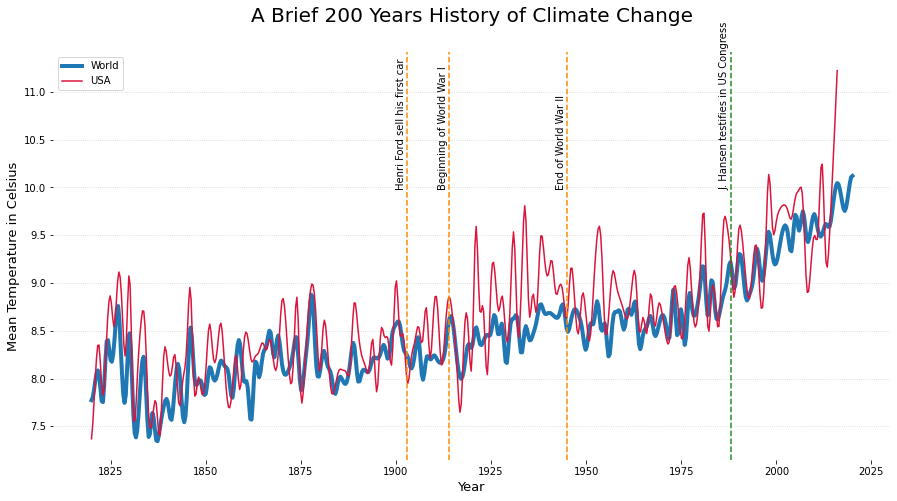

In [81]:
# initiate plot
plt.figure(figsize=(15,7.5))

ax = plt.gca()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.plot(ww_x,ww_y, '-', label='World', lw=4)
plt.plot(usa_x,usa_y, '-', label='USA', color='crimson')

plt.legend(loc='upper left')
plt.grid(axis='y',linestyle=':', color='lightgray')
# set label 
plt.xlabel('Year', fontsize=13)
plt.ylabel('Mean Temperature in Celsius', fontsize=13)
ax.set_title('A Brief 200 Years History of Climate Change' , pad=30 ,fontdict = {'fontsize' : 20})

plt.axvline(x=ford,color='darkorange',linestyle='--')
plt.text(ford-3,10,'Henri Ford sell his first car',rotation=90)

plt.axvline(x=World_War_I,color='darkorange',linestyle='--')
plt.text(World_War_I-3,10,'Beginning of World War I',rotation=90)

plt.axvline(x=World_War_II,color='darkorange',linestyle='--')
plt.text(World_War_II-3,10,'End of World War II',rotation=90)

plt.axvline(x=hansen_congress,color='forestgreen',linestyle='--')
plt.text(hansen_congress-3,10,'J. Hansen testifies in US Congress',rotation=90)

plt.show();

The industrial revolution started over 200 years ago and eventually evolved to the consumption society we live in today. The influences of such intense activities have been studied for close to half a century. However there is still a large scepticism and a general inactivity from the world political class.

A Brief 200 Years History of Climate Change simply shows the evolution of the average temperature in the 1st world economy (USA) and in the World. This time series is enriched with impactful events from the 20th century. For example, the beginning of the car industry and large fossil fuel consumption symbolised by Henri Ford's first car sale in 1903. Obviously, both World Wars have also contributed to a drastic increase in fossil fuel consumption. Last but not least, I highlighted the very first time a scientist has testified in front of the US Congress to communicate broadly the, then, observed global warming. J.Hansen also presented in 1988 various predictions on the increase of world temperature if politics would not legislate to protect earth climate. Sadly, the chart shows a steady increase in earth's average temperature since Hansen's speech. Our political class has not been able to act and reduce this alarming increasing trend. As I write this conclusion, the COP26 is being held in Glasgow. Will world leaders finally act 33 years after Hansen's speech?